**TF-IDF Use case**

* Humans 👦 show different emotions/feelings based on the situations and communicate them through facial expressions or in form of words.

* For a given comment/text, we are going to use classical NLP techniques and classify under which emotion that particular comment belongs!

* We are going to use techniques like TF-IDF. for text representation and apply different classification algorithms.

**Used** **dataset**

* Credits --> https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

# Loading Dataset

In [22]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [23]:
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

In [24]:
!unzip emotions-dataset-for-nlp.zip

# Checking Dataset

In [25]:
import pandas as pd
data_train = pd.read_csv('train.txt', sep = ';', engine = 'python', names = ["Text", "Emotion"])
data_test = pd.read_csv('test.txt', sep = ';', engine = 'python', names = ["Text", "Emotion"])

In [26]:
data_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [27]:
data_test.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [28]:
data_test.Emotion.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Emotion, dtype: int64

In [29]:
data_train.Emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [30]:
data_train.shape

(16000, 2)

In [31]:
data_test.shape

(2000, 2)

In [33]:
data = pd.concat([data_train,data_test], axis = 0)

In [34]:
data['label_num'] = data['Emotion'].map({
    'joy' : 0,
    'sadness': 1,
    'anger': 2,
    'fear': 3,
    'love': 4,
    'surprise':5
})

data

,Text,Emotion,label_num
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2
...,...,...,...
1995,i just keep feeling like someone is being unki...,anger,2
1996,im feeling a little cranky negative after this...,anger,2
1997,i feel that i am useful to my people and that ...,joy,0
1998,im feeling more comfortable with derby i feel ...,joy,0


In [35]:
data.label_num.value_counts()

0    6057
1    5247
2    2434
3    2161
4    1463
5     638
Name: label_num, dtype: int64

In [36]:
data.label_num.count()

18000

# Modelling without Pre-processing Text data

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    data.Text,
    data.label_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = data.label_num
)

## K nearest Classifier

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

clf = Pipeline([
    ('vector_tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74      1211
           1       0.70      0.79      0.74      1049
           2       0.77      0.53      0.62       487
           3       0.75      0.54      0.63       432
           4       0.74      0.39      0.51       293
           5       0.76      0.32      0.45       128

    accuracy                           0.70      3600
   macro avg       0.73      0.57      0.62      3600
weighted avg       0.71      0.70      0.68      3600



## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier


clf = Pipeline([
    ('vectorizer_n_grams', TfidfVectorizer()),
    ('random_forest', (RandomForestClassifier()))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1211
           1       0.91      0.87      0.89      1049
           2       0.90      0.80      0.85       487
           3       0.80      0.79      0.80       432
           4       0.83      0.66      0.74       293
           5       0.79      0.60      0.68       128

    accuracy                           0.85      3600
   macro avg       0.84      0.78      0.80      3600
weighted avg       0.85      0.85      0.84      3600



## Multinomial naive bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_trigrams',TfidfVectorizer()),
    ('Multi NB', MultinomialNB(alpha = 0.75))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.98      0.74      1211
           1       0.69      0.92      0.79      1049
           2       0.97      0.22      0.36       487
           3       0.80      0.14      0.24       432
           4       1.00      0.04      0.08       293
           5       0.00      0.00      0.00       128

    accuracy                           0.65      3600
   macro avg       0.68      0.38      0.37      3600
weighted avg       0.71      0.65      0.56      3600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# By Using text pre-processing

In [43]:
import spacy

In [44]:
nlp = spacy.load("en_core_web_sm")

In [51]:
def preprocess(text):
  doc = nlp(text)
  filtered_text = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    else:
      filtered_text.append(token.lemma_)

  return " ".join(filtered_text)

In [52]:
data['filtered_tex'] = data['Text'].apply(preprocess)
data.head()

,Text,Emotion,label_num,filtered_tex
0,i didnt feel humiliated,sadness,1,not feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,1,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,2,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,4,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,2,feel grouchy


In [53]:
X_train,X_test,y_train,y_test = train_test_split(
    data.filtered_tex,
    data.label_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = data.label_num
)

## Multinomial naive bayes

In [56]:
clf = Pipeline([
    ('vectorizer_trigrams',TfidfVectorizer()),
    ('Multi NB', MultinomialNB(alpha = 0.75))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      1211
           1       0.70      0.92      0.80      1049
           2       0.94      0.40      0.56       487
           3       0.85      0.35      0.50       432
           4       1.00      0.13      0.23       293
           5       1.00      0.01      0.02       128

    accuracy                           0.70      3600
   macro avg       0.86      0.46      0.48      3600
weighted avg       0.77      0.70      0.65      3600



## k nearest classifier

In [57]:
clf = Pipeline([
    ('vector_tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1211
           1       0.78      0.86      0.81      1049
           2       0.80      0.70      0.75       487
           3       0.83      0.67      0.74       432
           4       0.72      0.49      0.59       293
           5       0.79      0.43      0.56       128

    accuracy                           0.77      3600
   macro avg       0.78      0.67      0.71      3600
weighted avg       0.78      0.77      0.77      3600



## Random Forest Classifier

In [63]:
clf = Pipeline([
    ('vectorizer_n_grams', TfidfVectorizer()),
    ('random_forest', (RandomForestClassifier()))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1211
           1       0.90      0.85      0.88      1049
           2       0.86      0.85      0.86       487
           3       0.79      0.82      0.80       432
           4       0.78      0.66      0.71       293
           5       0.78      0.62      0.70       128

    accuracy                           0.84      3600
   macro avg       0.82      0.79      0.80      3600
weighted avg       0.84      0.84      0.84      3600



In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1097,   34,   20,   15,   38,    7],
       [  88,  896,   28,   25,    9,    3],
       [  22,   32,  415,   14,    3,    1],
       [  27,   19,   17,  353,    5,   11],
       [  86,    8,    1,    4,  194,    0],
       [   8,    3,    1,   35,    1,   80]])

Text(95.72222222222221, 0.5, 'Truth')

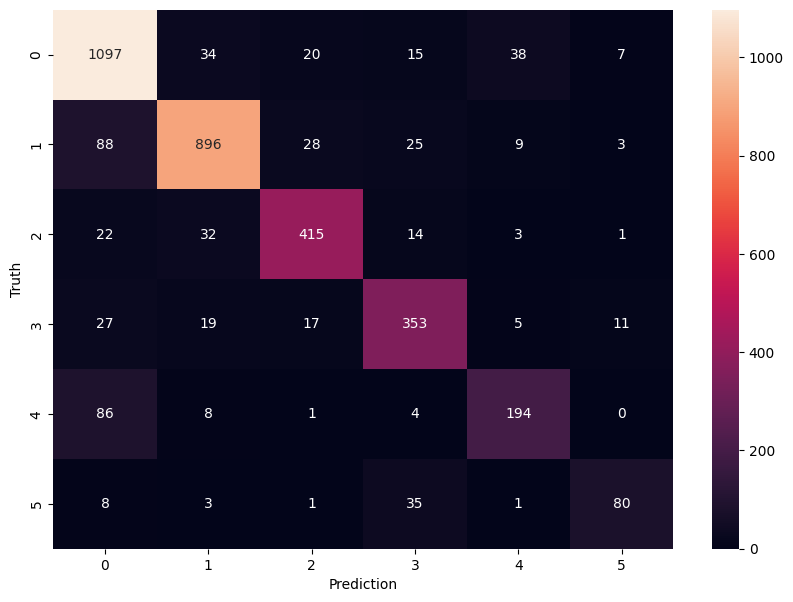

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# **Final Observations**
* As part of this exercise we have trained the data with algorithms like Multinomial Naive Bayes and Random Forest which are most used and provide good results for text related problems.

* As Machine learning algorithms do not work on text data directly, we need to convert them into numeric vectors and feed that into models while training. For this purpose, we have used TF-IDF text representation techniques.

# **Key Findings**

* There's not much improvement in results before pre-processing and after pre-processing the data.

* TF-IDF performed equally well in performance metrics like Recall and F1-score.

* Random Forest performed quite well when compared to Multinomial Naive Bayes.

**Machine Learning is like a trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which gives good results and satisfies the requirements like latency, interpretability, etc.**